In [1]:
from helpers.readSetFiles import readSetFiles,validateParameters,readNumberSetFiles
from graph import plotEpochsError,plotGraphEj1,plotGraphEj1Animated,plotErrorAgainstKGraph,plotErrorAgainstTrainingPercentageGraph,plotMetricsAgainstVariable,plotMetricAgainstVariable
from helpers.configHelper import ConfigHelper
from neuralNetworkManager import NeuralNetworkManager
from activationFunctions.stepActivationFunction import StepActivationFunction
from activationFunctions.linealActivationFunction import LinealActivationFunction
from activationFunctions.hyperbolicTangentActivationFunction import HyperbolicTangentActivationFunction
from activationFunctions.sigmoidalActivationFunction import SigmoidalActivationFunction
from helpers.noise import createTrainingSetWithNoise
from app import normalize
from output import Output
from metrics import Metrics
import copy

# Ej1 - Perceptron Simple Escalon

##### Funcion logica ’Y’ con entradas

In [ ]:
configPath="./config/Ej1/configEj1.json"
configHelper = ConfigHelper(configPath)
(architecture,activationFunction,beta,learningRate,maxIterations,maxToleranceExponent) = configHelper.getProperties()
(trainingSet,resultsSet)=readSetFiles("./datasets/Ej1/training_set_ej_1.txt","./datasets/Ej1/result_set_ej_1_and.txt")

neuralNetworkManager = NeuralNetworkManager(architecture,activationFunction,learningRate,maxIterations,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
#Plot error graph
plotEpochsError(epochs)
#Plot points and division graph
isXOR = False
plotGraphEj1(trainingSet,isXOR,epochs)
##Crear la carpeta de resultados con la subcarpeta de graficos y estadisticas en caso de que no existan
isEj1 = True
plotGraphEj1Animated(trainingSet,isXOR,epochs,isEj1)
#Print output
print("FINISH-------------------------------------------------------------------------------------------")
output = Output(configHelper,epochs[-1].error,epochs[-1].iterationNumber,executionTime)
output.printOutput()

##### Funcion logica ’O exclusivo’ con entradas

In [ ]:
configPath="./config/Ej1/configEj1.json"
configHelper = ConfigHelper(configPath)
(architecture,activationFunction,beta,learningRate,maxIterations,maxToleranceExponent) = configHelper.getProperties()
(trainingSet,resultsSet)=readSetFiles("./datasets/Ej1/training_set_ej_1.txt","./datasets/Ej1/result_set_ej_1_xor.txt")

neuralNetworkManager = NeuralNetworkManager(architecture,activationFunction,learningRate,maxIterations,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
#Plot error graph
plotEpochsError(epochs)
#Plot points and division graph
isXOR = True
plotGraphEj1(trainingSet,isXOR,epochs)
isEj1 = True
plotGraphEj1Animated(trainingSet,isXOR,epochs,isEj1)
#Print output
print("FINISH-------------------------------------------------------------------------------------------")
output = Output(configHelper,epochs[-1].error,epochs[-1].iterationNumber,executionTime)
output.printOutput()

# Ej2 Perceptron Simple lineal/no lineal


In [ ]:
(architecture,activationFunction,beta,learningRate,maxIterations,maxToleranceExponent) = ConfigHelper("./config/Ej2/configEj2.json").getProperties()
(trainingSet,resultsSet)=readSetFiles("./datasets/Ej2/training_set_ej_2.txt","./datasets/Ej2/result_set_ej_2.txt")
(resultsSetNormalized,fixnt)=normalize(resultsSet,0,1)
activationFunctions=[HyperbolicTangentActivationFunction(beta),SigmoidalActivationFunction(beta)]
neuralNetworkManager = NeuralNetworkManager(architecture,LinealActivationFunction.getType(beta),learningRate,maxIterations,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
plotEpochsError(epochs,"Lineal Activation Function")
for aF in activationFunctions:
    neuralNetworkManager = NeuralNetworkManager(architecture,aF,learningRate,maxIterations,maxToleranceExponent)
    (epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSetNormalized)
    plotEpochsError(epochs,title=aF.name,denormalizeFn=fixnt)


# Ej3 Perceptron Multicapa

##### 3.1 Funciones logicas ’Y’ y ’O exclusivo’ con entradas

##### ’Y’

In [ ]:
import random
import numpy as np
random.seed(11)
np.random.seed(11)
configPath="./config/Ej3/3_1/configEj3_1.json"
configHelper = ConfigHelper(configPath)
(architecture,activationFunction,beta,learningRate,maxIterations,maxToleranceExponent) = configHelper.getProperties()
(trainingSet,resultsSet)=readSetFiles("./datasets/Ej1/training_set_ej_1.txt","./datasets/Ej1/result_set_ej_1_and.txt")

neuralNetworkManager = NeuralNetworkManager(architecture,activationFunction,learningRate,maxIterations,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
#Plot error graph
plotEpochsError(epochs)
#Plot points and division graph
isXOR = False
plotGraphEj1(trainingSet,isXOR,epochs)
isEj1 = False
plotGraphEj1Animated(trainingSet,isXOR,epochs,isEj1)
#Print output
print("FINISH-------------------------------------------------------------------------------------------")
output = Output(configHelper,epochs[-1].error,epochs[-1].iterationNumber,executionTime)
output.printOutput()

##### ’O exclusivo’

In [ ]:
configPath="./config/Ej3/3_1/configEj3_1.json"
configHelper = ConfigHelper(configPath)
(architecture,activationFunction,beta,learningRate,maxIterations,maxToleranceExponent) = configHelper.getProperties()
(trainingSet,resultsSet)=readSetFiles("./datasets/Ej1/training_set_ej_1.txt","./datasets/Ej1/result_set_ej_1_and.txt")

neuralNetworkManager = NeuralNetworkManager(architecture,activationFunction,learningRate,maxIterations,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
#Plot error graph
plotEpochsError(epochs)
#Plot points and division graph
isXOR = True
plotGraphEj1(trainingSet,isXOR,epochs)
isEj1 = False
plotGraphEj1Animated(trainingSet,isXOR,epochs,isEj1)
#Print output
print("FINISH-------------------------------------------------------------------------------------------")
output = Output(configHelper,epochs[-1].error,epochs[-1].iterationNumber,executionTime)
output.printOutput()

##### 3.2 Indicar paridad para numeros del 0 al 9

In [ ]:
configPath="./config/Ej3/3_2/configEj3_2.json"
configHelper = ConfigHelper(configPath)
(architecture,activationFunction,beta,learningRate,maxIterations,maxToleranceExponent) = configHelper.getProperties()
(trainingSet,resultsSet)=readNumberSetFiles("./datasets/Ej3/training_set_ej_3.txt","./datasets/Ej3/result_set_ej_3_2.txt")
print(trainingSet)
print(resultsSet)
#Creamos la instancia para metricas
classes = [1,-1]
metrics = Metrics(classes,False)
neuralNetworkManager = NeuralNetworkManager(architecture,activationFunction,learningRate,maxIterations,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
print("FINISH-------------------------------------------------------------------------------------------")
# print(epochs)
output = Output(configHelper,epochs[-1].error,epochs[-1].iterationNumber,executionTime)
output.printOutput()
print("----------------------EVALUATE GENERALITAZTION----------------------------------------------------")
errors = []
kArray = []
trainingPercentages = []
# metricsArrays = {'accuracy':[],'precision':[],'recall':[],'f_1-score':[],'true_positive_rate':[],'false_positive_rate':[]}
accuracyArray = []
for k in range(2,len(trainingSet)+1):
    kArray.append(k)
    (error,trainingPercentage,metricsDict,maxAccuracy) = neuralNetworkManager.crossValidation(trainingSet,resultsSet,k,copy.deepcopy(metrics))
    errors.append(error)
    trainingPercentages.append(trainingPercentage)
    accuracyArray.append(maxAccuracy)
    # metricsArrays['accuracy'].append(metricsDict['accuracy'])
    # metricsArrays['precision'].append(metricsDict['precision'])
    # metricsArrays['recall'].append(metricsDict['recall'])
    # metricsArrays['f_1-score'].append(metricsDict['f_1-score'])
    # metricsArrays['true_positive_rate'].append(metricsDict['true_positive_rate'])
    # metricsArrays['false_positive_rate'].append(metricsDict['false_positive_rate'])
# plotMetricsAgainstVariable(metricsArrays,kArray,"K")
# plotMetricsAgainstVariable(metricsArrays,trainingPercentages,"Training percentage")
plotMetricAgainstVariable(accuracyArray,"Accuracy",kArray,"K")
plotMetricAgainstVariable(accuracyArray,"Accuracy",trainingPercentages,"Training percentage")


##### 3.3 Indicar que numero es, para numeros del 0 al 9

FINISH-------------------------------------------------------------------------------------------
OUTPUT :
        - Configuration paramaters :
            	-Architecture : [35, 15, 15, 15, 4, 10]
		-Activation function :SIGMOIDAL
		-Beta : 0.45
		-Learning rate : 0.1 
		-Max iterations : 100
		-Error bound : 1e^-12
        - Error : 4.500035387216387

        - Epoch : 99

        - Execution time : 1.2078725480000685 sec
----------------------EVALUATE GENERALITAZTION----------------------------------------------------


/home/agustin/code/SIA/SIA-EquipoTermos/TP3/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


Cross validation with k=2 results:
	error min == 4.700186897522005
	training percentage == 0.5
	metrics ==  {'accuracy': 0.7999999999999999, 'precision': 0.0, 'recall': 0.0, 'f_1-score': 0.0, 'true_positive_rate': 0.0, 'false_positive_rate': 0.1}
	max accuracy ==  0.7999999999999999
Cross validation with k=3 results:
	error min == 4.583699971311324
	training percentage == 0.6666666666666667
	metrics ==  {'accuracy': 0.8, 'precision': 0.0, 'recall': 0.0, 'f_1-score': 0.0, 'true_positive_rate': 0.0, 'false_positive_rate': 0.1}
	max accuracy ==  0.8
Cross validation with k=4 results:
	error min == 4.549840485193197
	training percentage == 0.75
	metrics ==  {'accuracy': 0.8, 'precision': 0.0, 'recall': 0.0, 'f_1-score': 0.0, 'true_positive_rate': 0.0, 'false_positive_rate': 0.1}
	max accuracy ==  0.8
Cross validation with k=5 results:
	error min == 4.552094126038361
	training percentage == 0.8
	metrics ==  {'accuracy': 0.8, 'precision': 0.0, 'recall': 0.0, 'f_1-score': 0.0, 'true_positive_

<Figure size 432x288 with 0 Axes>

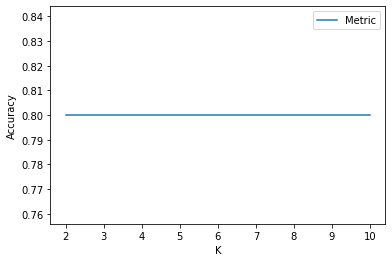

<Figure size 432x288 with 0 Axes>

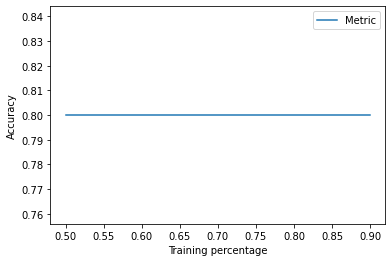

In [13]:
configPath="./config/Ej3/3_3/configEj3_3.json"
configHelper = ConfigHelper(configPath)
(architecture,activationFunction,beta,learningRate,maxIterations,maxToleranceExponent) = configHelper.getProperties()
(trainingSet,resultsSet)=readNumberSetFiles("./datasets/Ej3/training_set_ej_3.txt","./datasets/Ej3/result_set_ej_3_3.txt")
#print(trainingSet)
#print(resultsSet)
#Creamos la instancia para metricas
classes = [0,1,2,3,4,5,6,7,8,9]
metrics = Metrics(classes,True)
neuralNetworkManager = NeuralNetworkManager(architecture,activationFunction,learningRate,maxIterations,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
print("FINISH-------------------------------------------------------------------------------------------")
# print(epochs)
output = Output(configHelper,epochs[-1].error,epochs[-1].iterationNumber,executionTime)
output.printOutput()
print("----------------------EVALUATE GENERALITAZTION----------------------------------------------------")
errors = []
kArray = []
trainingPercentages = []
# metricsArrays = {'accuracy':[],'precision':[],'recall':[],'f_1-score':[],'true_positive_rate':[],'false_positive_rate':[]}
accuracyArray = []
for k in range(2,len(trainingSet)+1):
    kArray.append(k)
    (error,trainingPercentage,metricsDict,maxAccuracy) = neuralNetworkManager.crossValidation(trainingSet,resultsSet,k,copy.deepcopy(metrics))
    errors.append(error)
    trainingPercentages.append(trainingPercentage)
    accuracyArray.append(maxAccuracy)
    # metricsArrays['accuracy'].append(metricsDict['accuracy'])
    # metricsArrays['precision'].append(metricsDict['precision'])
    # metricsArrays['recall'].append(metricsDict['recall'])
    # metricsArrays['f_1-score'].append(metricsDict['f_1-score'])
    # metricsArrays['true_positive_rate'].append(metricsDict['true_positive_rate'])
    # metricsArrays['false_positive_rate'].append(metricsDict['false_positive_rate'])
plotMetricAgainstVariable(accuracyArray,"Accuracy",kArray,"K")
plotMetricAgainstVariable(accuracyArray,"Accuracy",trainingPercentages,"Training percentage")

##### Agregar ruido

[49.0, 55.0, 49.0, 61.0, 57.0, 51.0, 51.0, 55.0, 51.0, 57.0, 53.0, 53.0, 55.0, 53.0, 49.0, 51.0, 53.0, 53.0, 49.0, 53.0, 57.0, 55.0, 55.0, 51.0, 59.0, 59.0, 57.0, 53.0, 61.0, 59.0, 51.0, 51.0, 53.0, 53.0, 49.0, 53.0, 59.0, 49.0, 51.0, 55.0, 57.0, 55.0, 57.0, 49.0, 53.0, 55.0, 51.0, 53.0, 53.0, 53.0, 53.0, 51.0, 55.0, 49.0, 57.0, 49.0, 57.0, 57.0, 59.0, 51.0, 59.0, 49.0, 57.0, 59.0, 53.0, 55.0, 57.0, 53.0, 55.0, 51.0, 49.0, 51.0, 51.0, 55.0, 53.0, 53.0, 55.0, 55.0, 53.0, 53.0, 51.0, 53.0, 55.0, 47.0, 55.0, 57.0, 49.0, 51.0, 51.0, 55.0, 53.0, 47.0, 57.0, 57.0, 51.0, 55.0, 57.0, 49.0, 55.0, 59.0]
[49.0, 55.0, 49.0, 61.0, 57.0, 51.0, 51.0, 55.0, 51.0, 57.0, 53.0, 53.0, 55.0, 53.0, 49.0, 51.0, 53.0, 53.0, 49.0, 53.0, 57.0, 55.0, 55.0, 51.0, 59.0, 59.0, 57.0, 53.0, 61.0, 59.0, 51.0, 51.0, 53.0, 53.0, 49.0, 53.0, 59.0, 49.0, 51.0, 55.0, 57.0, 55.0, 57.0, 49.0, 53.0, 55.0, 51.0, 53.0, 53.0, 53.0, 53.0, 51.0, 55.0, 49.0, 57.0, 49.0, 57.0, 57.0, 59.0, 51.0, 59.0, 49.0, 57.0, 59.0, 53.0, 55.0, 57

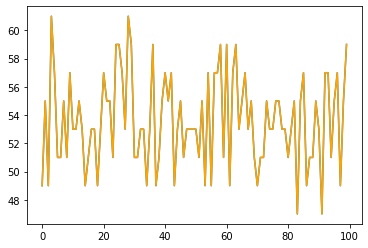

In [12]:


errorsNoise=[]

for epoch in epochs:
    (errorWNoise,aux,aux2,aux3)= neuralNetworkManager.test(createTrainingSetWithNoise(trainingSet),resultsSet,layers=epoch.layers)
    errorsNoise.append(errorWNoise)
    normalError.append(epoch.error)
print(errorsNoise)
plotEpochsError(epochs,testingSetErrors=errorsNoise)

